In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
walmart_data = pd.read_csv('walmart_data.csv')

In [3]:
walmart_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<AxesSubplot:>

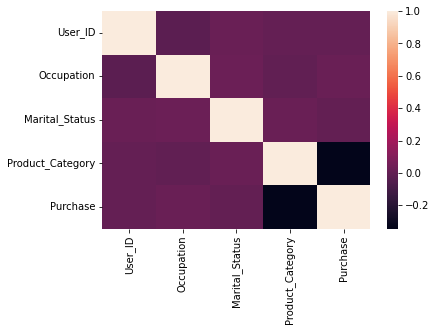

In [4]:
sns.heatmap(walmart_data.corr())

In [5]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
walmart_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [23]:
walmart_data['Product_Category'].nunique()

20

In [31]:
(walmart_data.columns).drop('Purchase')

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category'],
      dtype='object')

In [33]:
walmart_data.select_dtypes(['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
550063,P00372445,M,51-55,B,1
550064,P00375436,F,26-35,C,3
550065,P00375436,F,26-35,B,4+
550066,P00375436,F,55+,C,2


In [34]:
walmart_data[(walmart_data.columns).drop('Purchase')] = walmart_data[(walmart_data.columns).drop('Purchase')].apply(lambda x: x.astype('category'))

In [20]:
walmart_data[['Gender', 'Age', 'Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']].apply(lambda x: x.astype('category'))

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,F,0-17,10,A,2,0
1,F,0-17,10,A,2,0
2,F,0-17,10,A,2,0
3,F,0-17,10,A,2,0
4,M,55+,16,C,4+,0
...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1
550064,F,26-35,1,C,3,0
550065,F,26-35,15,B,4+,1
550066,F,55+,1,C,2,0


In [35]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [42]:
users = pd.DataFrame(walmart_data.groupby(['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']).nunique())

In [43]:
users[1:3]

Product_ID  \
User_ID Gender Age  Occupation City_Category Stay_In_Current_City_Years Marital_Status               
1000001 F      0-17 0          A             0                          1                        0   
                                             1                          0                        0   

                                                                                        Product_Category  \
User_ID Gender Age  Occupation City_Category Stay_In_Current_City_Years Marital_Status                     
1000001 F      0-17 0          A             0                          1                              0   
                                             1                          0                              0   

                                                                                        Purchase  
User_ID Gender Age  Occupation City_Category Stay_In_Current_City_Years Marital_Status            
1000001 F      0-17 0          A             0                          1                      0  
                                             1                          0                      0

In [16]:
walmart_data.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [17]:
walmart_data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Purchase'>

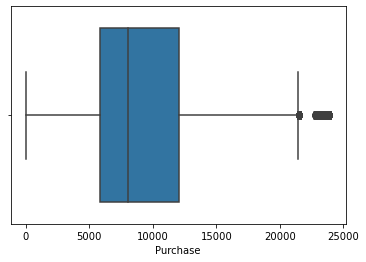

In [8]:
sns.boxplot(data=walmart_data,x='Purchase')

In [17]:
walmart_data[(walmart_data['Purchase']>22000) & (walmart_data['Product_Category']==10) ]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


<AxesSubplot:xlabel='Purchase'>

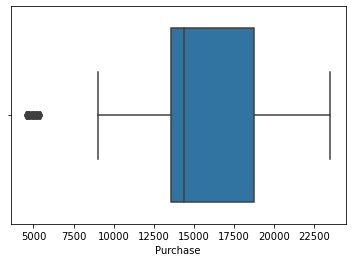

In [22]:
sns.boxplot(data=walmart_data[walmart_data['Product_Category']==9],x='Purchase')

In [21]:
walmart_data[walmart_data['Product_Category']==9]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
2165,1000338,P00184242,M,36-45,7,A,1,0,9,9662
2197,1000343,P00184242,F,36-45,3,B,2,0,9,18362
7995,1001243,P00184242,M,36-45,15,B,4+,1,9,9282
8951,1001369,P00184242,M,26-35,5,B,1,1,9,13809
9550,1001451,P00184242,M,36-45,20,B,0,0,9,18339
...,...,...,...,...,...,...,...,...,...,...
540430,1005218,P00184242,M,18-25,0,C,1,0,9,18458
540956,1005307,P00184242,M,26-35,5,C,1,0,9,23241
541035,1005319,P00184242,M,18-25,17,B,1,0,9,22989
542909,1005596,P00184242,M,36-45,12,B,1,0,9,9910


In [20]:
walmart_data[(walmart_data['Purchase']>22000)]['Product_Category'].value_counts()

10    2275
9       75
Name: Product_Category, dtype: int64

<AxesSubplot:xlabel='User_ID', ylabel='count'>

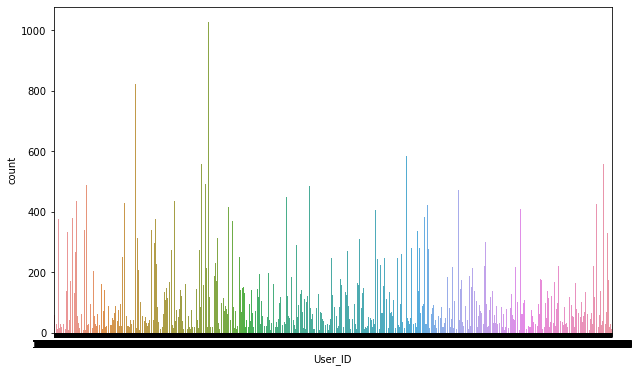

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data=walmart_data,x='User_ID')

In [68]:
count=pd.DataFrame(pd.Series(walmart_data['User_ID'].value_counts(),name='count'))

In [62]:
d={'a':[1,2,3],'b':['ad','das','ads']}
e={'a':[2,1,3],'c':['adsd','ref','qsd']}

In [63]:
dfd=pd.DataFrame(d,index=d['a'])
dfe=pd.DataFrame(e,index=e['a'])

In [64]:
pd.merge(left=dfd,right=dfe)

,a,b,c
0,1,ad,ref
1,2,das,adsd
2,3,ads,qsd


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

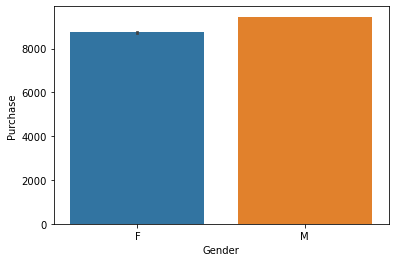

In [69]:
sns.barplot(data=walmart_data,x='Gender',y='Purchase')

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

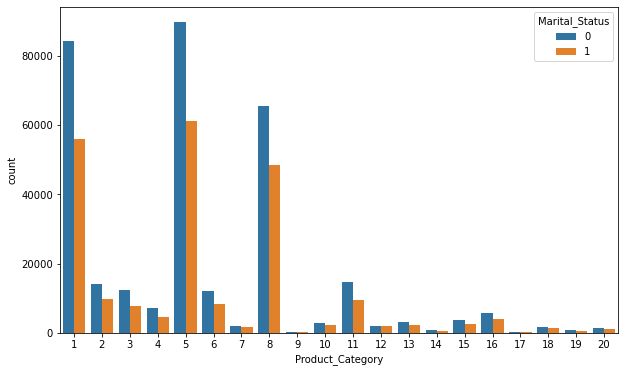

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(data=walmart_data,x='Product_Category',hue='Marital_Status')

In [6]:
walmart_data.groupby(['Product_ID'])['Purchase'].mean()

Product_ID
P00000142    11143.642361
P00000242    10551.851064
P00000342     5313.422131
P00000442     4795.358696
P00000542     5417.530201
                 ...     
P0099442     14351.915000
P0099642      6439.230769
P0099742      7872.603175
P0099842      7228.549020
P0099942      5572.785714
Name: Purchase, Length: 3631, dtype: float64

In [8]:
walmart_data['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [9]:
walmart_data.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [11]:
no_of_products= pd.DataFrame(walmart_data.groupby(['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status'])['Product_ID'].nunique())

In [24]:
no_of_products.index.get_level_values(5)

Index(['2', '4+', '3', '2', '1', '1', '1', '4+', '0', '4+',
       ...
       '1', '3', '1', '3', '3', '4+', '4+', '2', '4+', '2'],
      dtype='object', name='Stay_In_Current_City_Years', length=5891)

In [28]:
no_of_products.reset_index(level=[1,2,3,4,5,6],inplace=True)

In [29]:
no_of_products.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_ID'],
      dtype='object')

In [7]:
total=pd.DataFrame(walmart_data.groupby(['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status'])['Purchase'].sum())

In [8]:
total.columns=['total']

In [37]:
total.columns

Index(['total'], dtype='object')

In [9]:
total.reset_index(level=[1],inplace=True)

<AxesSubplot:xlabel='Gender', ylabel='total'>

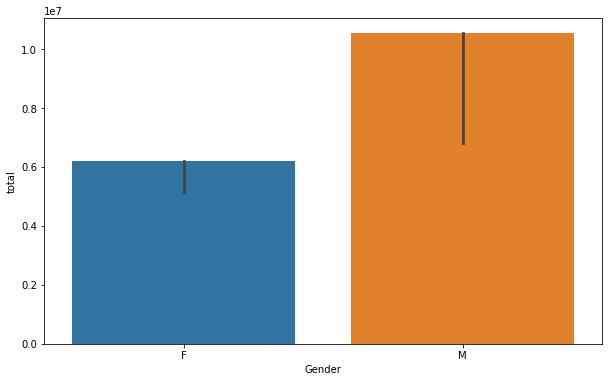

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(data=total,x='Gender',y='total',estimator=np.max)

In [11]:
users=pd.DataFrame(walmart_data[['User_ID','Gender']].groupby(['User_ID','Gender']).nunique())

In [15]:
users.reset_index([0,1],inplace=True)

In [20]:
users.sample(weights=[0.5,0.5])

ValueError: Weights and axis to be sampled must be of same length

In [17]:
users['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
strat,_ = train_test_split(users,test_size=0.001,stratify=users['Gender'])

In [25]:
strat

,User_ID,Gender
5244,1005382,M
1035,1001071,M
1970,1002027,F
1786,1001839,M
682,1000704,F
...,...,...
3026,1003109,F
5673,1005821,M
1578,1001623,M
5379,1005518,M


In [26]:
strat['Gender'].value_counts()

M    2112
F     833
Name: Gender, dtype: int64

In [32]:
users['Gender'].sample(weights=[0.5],axis='Gender')

ValueError: No axis named Gender for object type Series

In [35]:
b=users[users['Gender']=='M'].sample(n=sum(users['Gender']=='F'))

In [36]:
pd.concat([users[users['Gender']=='F'],b])

,User_ID,Gender
0,1000001,F
5,1000006,F
9,1000010,F
10,1000011,F
15,1000016,F
...,...,...
4300,1004413,M
920,1000950,M
1498,1001543,M
5765,1005915,M


In [37]:
b['User_ID'].nunique()

1666

In [ ]:
pd.DataFrame(pd.merge(walmart_data, fifty)[walmart_data.columns].groupby(['User_ID','Gender'])[['User_ID','Gender']].nunique(),columns=['a','b']).reset_index([0,1])['Gender'].value_counts()

<AxesSubplot:xlabel='total', ylabel='Count'>

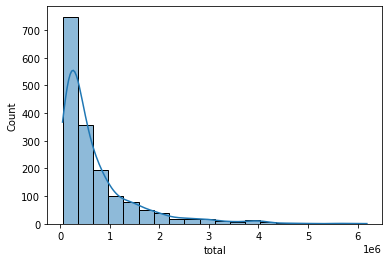

In [22]:
sns.histplot(data=total[total['Gender']=='F'],x='total',bins=20,kde=True)

In [33]:
values=np.array([np.random.choice(total[total['Gender']=='M']['total'],size=len(total[total['Gender']=='M']['total']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of male total purchase ',np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)])) 

# array([-0.13559955, 0.26480175])
m=values.mean()
s=values.std()
clt=[m-2*s,m+2*s]
print('Central limit of male total purchase ',clt)

Confidence interval of male total purchase  [895923.18614793 954512.0637929 ]
Central limit of male total purchase  [894655.5770629022, 956411.3554473937]


In [27]:
values=[np.random.choice(total[total['Gender']=='F']['total'],size=len(total[total['Gender']=='M']['total']),replace=True).mean() for i in range(1000)] 
np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)]) 
# array([-0.13559955, 0.26480175])

array([688017.4996568 , 737840.05605917])

<AxesSubplot:ylabel='Purchase'>

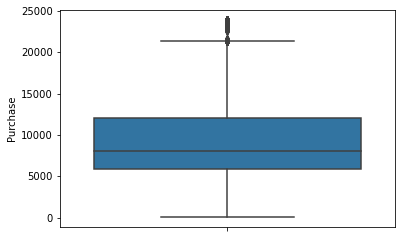

In [35]:
sns.boxplot(data=walmart_data,y='Purchase',hue='Gender')

In [ ]:
values=[np.random.choice(total[(total['Gender']=='M') & (total['total']) ]['total'],size=len(total[total['Gender']=='M']['total']),replace=True).mean() for i in range(1000)] 
np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)]) 
# array([-0.13559955, 0.26480175])

In [ ]:
values=[np.random.choice(total[total['Gender']=='F']['total'],size=len(total[total['Gender']=='M']['total']),replace=True).mean() for i in range(1000)] 
np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)]) 
# array([-0.13559955, 0.26480175])

In [36]:
walmart_data['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64